# Playing card examples

In this notebook, we provide some examples of playing cards that can be created using the **dobble** package.

Before running this notebook, make sure that you have installed the **dobble** package in your virtual environment.  
We start by performing all necessary imports.

In [1]:
import numpy as np
from dobble import Card
from dobble import utils

from utils import *

## Manually creating cards from scratch

The most straight-forward way to create playing cards with the **dobble** package is to hand-pick the emojis one wants to use  
from the OpenMoji dataset, collect their names in a list, and pass the latter to the `Card` class to create the playing card.  
Let's look at two examples.


### A first playing card

For this example, we'll use the following emojis:

* [maracas](https://openmoji.org/library/emoji-1FA87/)
* [cupcake](https://openmoji.org/library/emoji-1F9C1/)
* [raspberry pi](https://openmoji.org/library/emoji-E1C9/)
* [trump](https://openmoji.org/library/emoji-E183/)
* [rocket](https://openmoji.org/library/emoji-1F680/)
* [sloth](https://openmoji.org/library/emoji-1F9A5/)

In [2]:
emojis = [
    "maracas",
    "cupcake",
    "raspberry pi",
    "trump",
    "rocket",
    "sloth"
]

To create the playing card, we simply call the `Card` class with the `emojis` list. We'll choose the "ccib" layout for this card.

In [3]:
card = Card(emojis, packing="ccib")

Right now, all emojis are facing the same direction and the card is not rotated either. To make the card more interesting, we  
rotate the playing card by 90 degrees counterclockwise, and then we randomly rotate each individual emoji.

In [4]:
card.rotate(90)
card.rotate_emojis(seed=42)

Let's take a look and save the image.

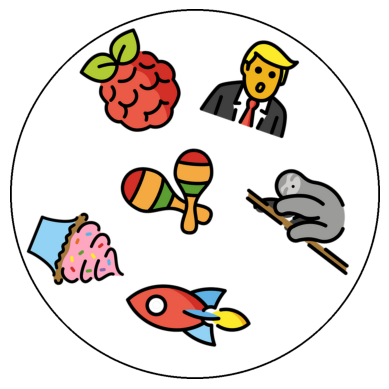

In [5]:
card_img = card.get_img()
save_card_img(card_img, "cards/mixed_ccib_6", overwrite=True)
display_card_inline(card_img)

### A coffee-themed playing card

Next, let's create a coffee-themed playing card using the same approach as before. First, we hand-pick the emojis that we want to  
use. For this playing card, we'll choose these emojis:

* [electric coffee percolator](https://openmoji.org/library/emoji-E154/)
* [latte macchiato](https://openmoji.org/library/emoji-E0C5/)
* [french press](https://openmoji.org/library/emoji-E151/)
* [drip coffee maker](https://openmoji.org/library/emoji-E155/)
* [milk jug](https://openmoji.org/library/emoji-E153/)
* [coffee grinder](https://openmoji.org/library/emoji-E156/)
* [espresso machine](https://openmoji.org/library/emoji-E150/)
* [moka pot](https://openmoji.org/library/emoji-E152/)

In [6]:
emojis = [
    "electric coffee percolator",
    "latte macchiato",
    "french press",
    "drip coffee maker",
    "milk jug",
    "coffee grinder",
    "espresso machine",
    "moka pot"
]

As before, we'll instantiate the card, then apply some rotation to it (and to the emojis), save it, and finally display it.  
This time, we're using the "ccir" layout.

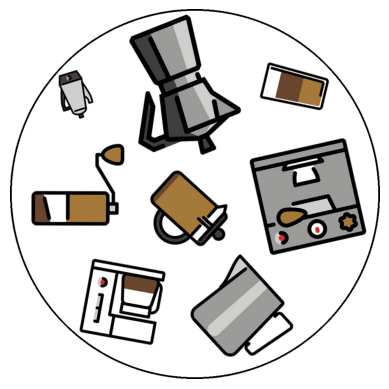

In [7]:
# Create card
card = Card(emojis, packing="ccir")

# Rotate card and emojis
card.rotate(seed=42)
card.rotate_emojis(seed=42)

# Create, save, and display image
card_img = card.get_img()
save_card_img(card_img, "cards/coffee_ccir_8", overwrite=True)
display_card_inline(card_img)

## Creating cards by sampling from OpenMoji (sub)groups

While the approach used so far is the most flexible, it's also the most time-consuming. Instead of hand-picking the emojis to use,  
we can choose a group or subgroup of OpenMoji emojis and randomly pick emojis from within this (sub)group. The following function  
allows us to do just that.

In [8]:
def create_card_from_group(
        group: str,
        num_emojis: int = 8,
        packing: str = "cci",
        seed: int = None
) -> Card:
    """Create a playing card using emojis from the specified (sub)group.

    Args:
        group: The OpenMoji group or subgroup from which to choose the
          emojis.
        num_emojis: The number of emojis to place on the card.
        packing: The packing determining the layout of the card.
        seed: A seed to use when picking the emojis from the group or
          subgroup.

    Returns:
        The created playing Card.
    """

    # Retrieve names of all emojis in the (sub)group
    valid_group_passed = False
    try:
        all_emojis = utils.get_emoji_names_by_group(group)
        valid_group_passed = True
    except ValueError:
        pass

    if not valid_group_passed:
        try:
            all_emojis = utils.get_emoji_names_by_subgroup(group)
        except ValueError:
            raise ValueError(
                f"'{group}' is not the name of a group or subgroup in the OpenMoji dataset."
            )

    # Randomly pick ``num_emojis`` emojis and create card
    rng = np.random.default_rng(seed=seed)
    selected_emojis = rng.choice(all_emojis, num_emojis, replace=False).tolist()
    card = Card(selected_emojis, packing=packing)

    return card


### Examples using subgroups

First, we'll look at two examples where we randomly sample from OpenMoji *subgroups*.


#### food-fruit

The first subgroup we'll use to sample emojis from is the [food-fruit](https://openmoji.org/library/#group=food-drink%2Ffood-fruit) subgroup.

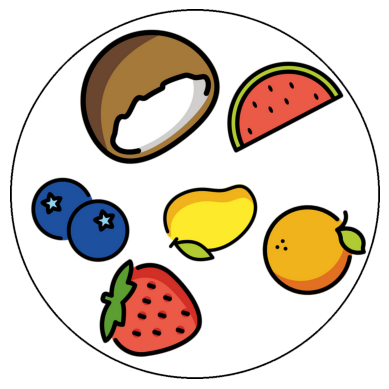

In [9]:
# Create card using the newly introduced function
card = create_card_from_group(
    "food-fruit",
    num_emojis=6,
    packing="ccib",
    seed=12
)

# Shuffle and rotate emojis, rotate card
card.shuffle_emojis(seed=14)
card.rotate_emojis(seed=30)
card.rotate(seed=62)

# Create, save, and display image
card_img = card.get_img()
save_card_img(card_img, "cards/fruits_ccib_6", overwrite=True)
display_card_inline(card_img)

#### brand

Let's do the same again, this time using the [brand](https://openmoji.org/library/#group=extras-openmoji%2Fbrand) subgroup.

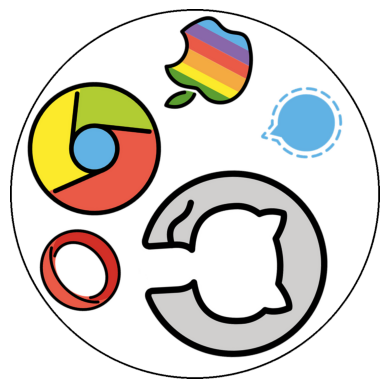

In [10]:
# Create card
card = create_card_from_group(
    "brand",
    num_emojis=5,
    packing="ccis",
    seed=25
)

# Shuffle and rotate emojis, rotate card
card.shuffle_emojis(seed=38)
card.rotate_emojis(seed=30)
card.rotate(seed=24)

# Create, save, and display image
card_img = card.get_img(padding=0.1)
save_card_img(card_img, "cards/brands_ccis_5", overwrite=True)
display_card_inline(card_img)

### Examples using groups

Next, we look at two examples, where we sample from OpenMoji *groups*.


#### animals-nature

The first group we'll sample from is the [animals-nature](https://openmoji.org/library/#group=animals-nature) group.

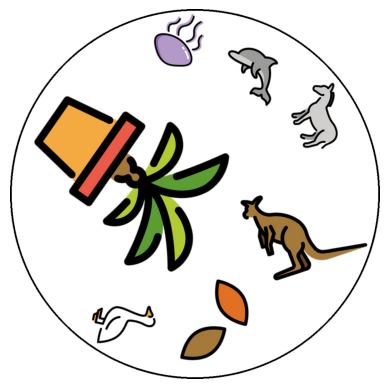

In [11]:
# Create card
card = create_card_from_group(
    "animals-nature",
    num_emojis=7,
    packing="ccic",
    seed=38
)

# Shuffle and rotate emojis, rotate card
card.shuffle_emojis(seed=22)
card.rotate_emojis(seed=42)
card.rotate(seed=10)

# Create, save, and display image
card_img = card.get_img()
save_card_img(card_img, "cards/animals_ccic_7", overwrite=True)
display_card_inline(card_img)

#### activities

Finally, we'll do the same with the [activities](https://openmoji.org/library/#group=activities) group.

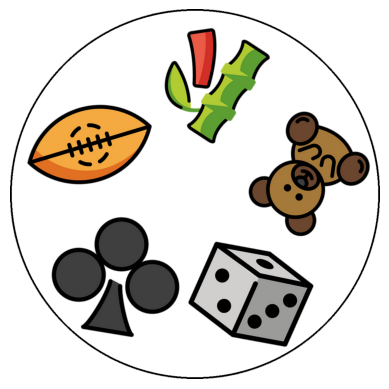

In [12]:
# Create card
card = create_card_from_group(
    "activities",
    num_emojis=5,
    packing="cci",
    seed=18
)

# Shuffle and rotate emojis, rotate card
card.shuffle_emojis(seed=36)
card.rotate_emojis(seed=23)
card.rotate(seed=20)

# Create, save, and display image
card_img = card.get_img()
save_card_img(card_img, "cards/activities_cci_5", overwrite=True)
display_card_inline(card_img)